University of Helsinki, Master's Programme in Data Science  
DATA16001 Network Analysis - Spring 2025  
Michail Mathioudakis  

# Assignment: SIR (due on Feb. 27)



For the questions below, consider the percolation version of the SIR model, described in **Section 21.3** of the textbook.

In particular, considering a fixed network with a directed graph $G(V,E)$, where $E \subseteq V \times V$, and given as input a probability $p \in [0,1]$, along with a subset $A \subseteq V$ of initially infected nodes, the set of **eventually infected nodes** $W_X(A) \subseteq V$ is computed in two steps.

### Step 1: Selecting Open Edges  

A subset $X \subseteq E$ of edges is chosen as **open**, where each edge is independently:  

- Chosen to be open with probability $p$  
- Chosen to be closed with probability $1 - p$  

### Step 2: Identifying Eventually Infected Nodes  

All nodes $W_X(A) \subseteq V$ that are **reachable from $A$ through only open edges $X$** are identified as eventually infected.  
**Note:** This includes the initially infected set $A$.  

Let $s_X(A) = |W_X(A)|$ be the **spread of the infection**, i.e., the number of eventually infected nodes as defined above.

Moreover, consider two sets of initially infected nodes, $A_1, A_2$, such that one is a subset of the other:

$$A_1 \subseteq A_2$$


#### Exercise.

Let $s(A)$ be the **expected spread** of the infection under the SIR model, computed over all possible open edge sets $X$, for a given set of initially infected nodes $A$.

### Prove or disprove each of the following

1. **Monotonicity of Infection Spread:**  
   $$s(A_1) \leq s(A_2)$$
   
2. **Marginal Gain Inequality:**  
   $$s(A_1 \cup \{u\}) - s(A_1) \geq s(A_2 \cup \{u\}) - s(A_2)$$

Determine whether each of these statements holds **for all possible graphs and probabilities** in the percolation version of the SIR model.



Test your answer to the above question, by implementing SIR and simulating its outcomes over 3 small networks of your choice, real or synthetic. Note: NetworkX offers plenty of options for such networks (link).

Describe your tests and their results in the text box below, and explain whether they agree with your answers. It is optional to produce plots -- but if you do, have them attached (do not place them in the text box).

In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random.seed(11)
np.random.seed(11)

In [3]:
def to_random_directed(G):
    H = nx.DiGraph()
    H.add_nodes_from(G.nodes())
    for u, v in G.edges():
        if random.random() < 0.5:
            H.add_edge(u, v)
        else:
            H.add_edge(v, u)
    return H

In [4]:
G1 = to_random_directed(nx.bull_graph())
G2 = to_random_directed(nx.petersen_graph())
G3 = to_random_directed(nx.cubical_graph())

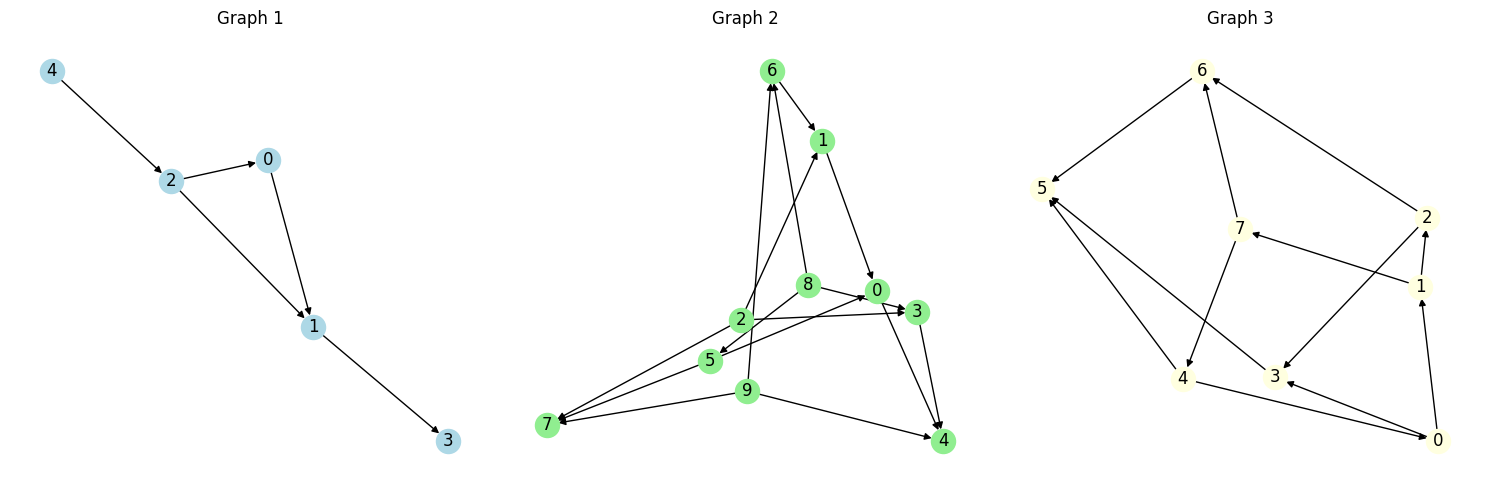

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
pos1 = nx.spring_layout(G1, seed=12)
nx.draw(G1, pos=pos1, ax=axs[0], with_labels=True, node_color='lightblue', arrows=True)
axs[0].set_title("Graph 1")

# Plot Graph 2.
pos2 = nx.spring_layout(G2, seed=19)
nx.draw(G2, pos=pos2, ax=axs[1], with_labels=True, node_color='lightgreen', arrows=True)
axs[1].set_title("Graph 2")

# Plot Graph 3.
pos3 = nx.spring_layout(G3, seed=12)
nx.draw(G3, pos=pos3, ax=axs[2], with_labels=True, node_color='lightyellow', arrows=True)
axs[2].set_title("Graph 3")

plt.tight_layout()  # Adjust spacing between plots
plt.show()


In [6]:
def simulate_sir(G, initial_set, p, num_simulations=1000):
	spreads = []
	for _ in range(num_simulations):
		H = nx.DiGraph()
		H.add_nodes_from(G.nodes())

		for u, v in G.edges():
			if random.random() < p:
				H.add_edge(u, v)
		infected = set(initial_set)
		for node in initial_set:
			infected = infected | nx.descendants(H, node)
		spreads.append(len(infected))
	
	return np.mean(spreads)

def test_sir(G, p_infection, num_simulations=1000):
	graph_nodes = list(G.nodes())
	# A1	
	A1 = {random.choice(graph_nodes)}
	# A2	
	remaining_nodes = set(graph_nodes) - A1
	if not remaining_nodes:
		A2 = set(A1)
	else:
		A2 = A1 | {random.choice(list(remaining_nodes))} | {random.choice(list(remaining_nodes))}
	# u
	u_list = list(set(graph_nodes) - A2)
	if u_list:
		u = random.choice(u_list)
	else:
		u = random.choice(list(A2))
	s_A1     = simulate_sir(G, A1, p_infection, num_simulations)
	s_A2     = simulate_sir(G, A2, p_infection, num_simulations)
	s_A1_u   = simulate_sir(G, A1 | {u}, p_infection, num_simulations)
	s_A2_u   = simulate_sir(G, A2 | {u}, p_infection, num_simulations)
	
	result = {
		"A1": A1,
		"A2": A2,
		"u": u,
		"s_A1": s_A1,
		"s_A2": s_A2,
		"s_A1_u": s_A1_u,
		"s_A2_u": s_A2_u,
		"delta0le0": s_A1 - s_A2 <= 0,
		"delta1": s_A1_u - s_A1,
		"delta2": s_A2_u - s_A2,
		"delta3ge0": (s_A1_u - s_A1) - (s_A2_u - s_A2) >= 0
	}
	return result


In [8]:
results = {}
results['Bull graph'] = test_sir(G1, p_infection = 0.3, num_simulations = 5000)
results['Petersen graph'] = test_sir(G2, p_infection = 0.3, num_simulations = 5000)
results['Cubical graph'] = test_sir(G3, p_infection = 0.3, num_simulations = 5000)

for graph_name, result in results.items():
    print(f"{graph_name}")
    print(f"set A1: {result['A1']}")
    print(f"set A2: {result['A2']}")
    print(f"node u: {result['u']}")
    print(f"s(A1): {result['s_A1']}")
    print(f"s(A2): {result['s_A2']}")
    print(f"s(A1 U {{u}}): {result['s_A1_u']}")
    print(f"s(A2 U {{u}}): {result['s_A2_u']}")
    print(f"s(A1) <= s(A2):", result['delta0le0'])
    print(f"s(A1 U {{u}}) - s(A1):", result['delta1'])
    print(f"s(A2 U {{u}}) - s(A2):", result['delta2'])
    print(f"s(A1 U {{u}}) - s(A1) >= s(A2 U {{u}}) - s(A2):", result['delta3ge0'])

Bull graph
set A1: {4}
set A2: {0, 2, 4}
node u: 1
s(A1): 1.5148
s(A2): 3.6854
s(A1 U {u}): 2.6934
s(A2 U {u}): 4.309
s(A1) <= s(A2): True
s(A1 U {u}) - s(A1): 1.1786
s(A2 U {u}) - s(A2): 0.6236000000000002
s(A1 U {u}) - s(A1) >= s(A2 U {u}) - s(A2): True
Petersen graph
set A1: {4}
set A2: {1, 4, 5}
node u: 0
s(A1): 1.0
s(A2): 3.8222
s(A1 U {u}): 2.0
s(A2 U {u}): 4.3014
s(A1) <= s(A2): True
s(A1 U {u}) - s(A1): 1.0
s(A2 U {u}) - s(A2): 0.47920000000000007
s(A1 U {u}) - s(A1) >= s(A2 U {u}) - s(A2): True
Cubical graph
set A1: {2}
set A2: {2, 3, 5}
node u: 1
s(A1): 1.7452
s(A2): 3.3058
s(A1 U {u}): 3.2832
s(A2 U {u}): 4.7986
s(A1) <= s(A2): True
s(A1 U {u}) - s(A1): 1.5379999999999998
s(A2 U {u}) - s(A2): 1.4928000000000003
s(A1 U {u}) - s(A1) >= s(A2 U {u}) - s(A2): True
